In [15]:
#Librerie utili
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
from scipy import stats 
import scipy.stats as st

In [16]:
con = sqlite3.connect("../code/omnet/simulations/results/simulate.sca")

In [17]:
dfThroughput=pd.read_sql_query("""
select scenario, config, clients, CAST(attrValue as INT), statCount / 3600.0 as throughput
from runConfig rc inner join statistic s on rc.runId = s.runId
        inner join runAttr ra on s.runId = ra.runId
where statName = "completedTransactions:stats"
 AND attrName = "repetition"
order by scenario, config, clients,  CAST(attrValue as INT)
""", con)

In [18]:
dfResponseTime=pd.read_sql_query("""
SELECT clients, scenario, config,attrValue,statMean as responseTime 
from runConfig rc inner join statistic s on rc.runId = s.runId
        inner join runAttr ra on s.runId = ra.runId
WHERE 
		statName = "responseTimeStat:stats" AND
		moduleName = "Network"
        AND attrName = "repetition"
ORDER BY scenario, config, clients, attrValue
""", con)

In [19]:
scenarios = ["s1","s2","s3","s4"]

In [22]:
dfThroughput['throughput_mean'] = dfThroughput.groupby(['scenario','config','clients'])['throughput'].transform('mean')
dfThroughput['throughput_residual'] = dfThroughput['throughput'] - dfThroughput['throughput_mean']
dfResponseTime['responseTime_mean'] = dfResponseTime.groupby(['scenario','config','clients'])['responseTime'].transform('mean')
dfResponseTime['responseTime_residual'] = dfResponseTime['responseTime'] - dfResponseTime['responseTime_mean']

In [23]:
dfThroughput.tail()
dfResponseTime.tail()

,clients,scenario,config,attrValue,responseTime,responseTime_mean,responseTime_residual
7995,49,s4,c8,5,78.344353,80.127672,-1.783319
7996,49,s4,c8,6,83.055173,80.127672,2.927501
7997,49,s4,c8,7,79.049603,80.127672,-1.078069
7998,49,s4,c8,8,82.351478,80.127672,2.223806
7999,49,s4,c8,9,83.552612,80.127672,3.424940


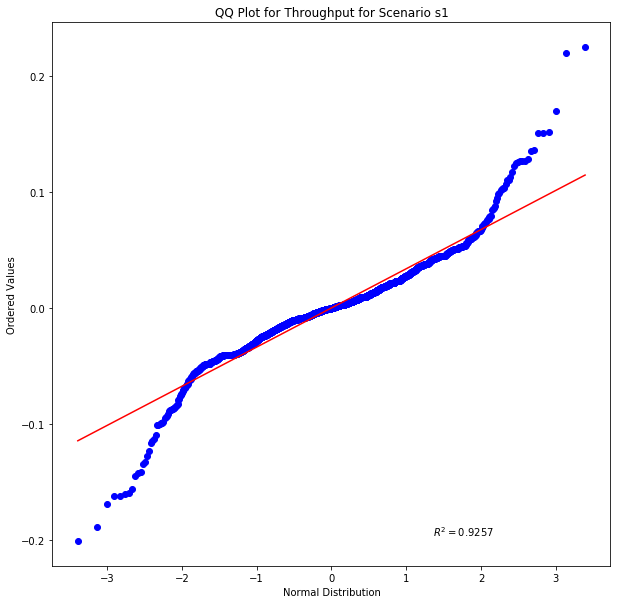

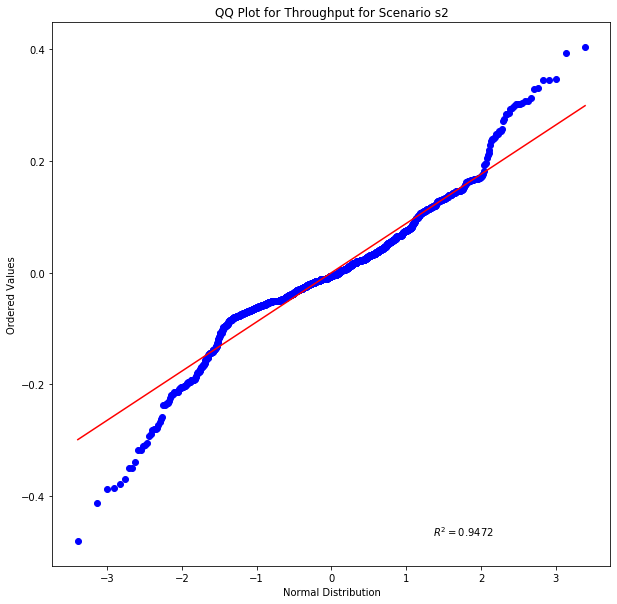

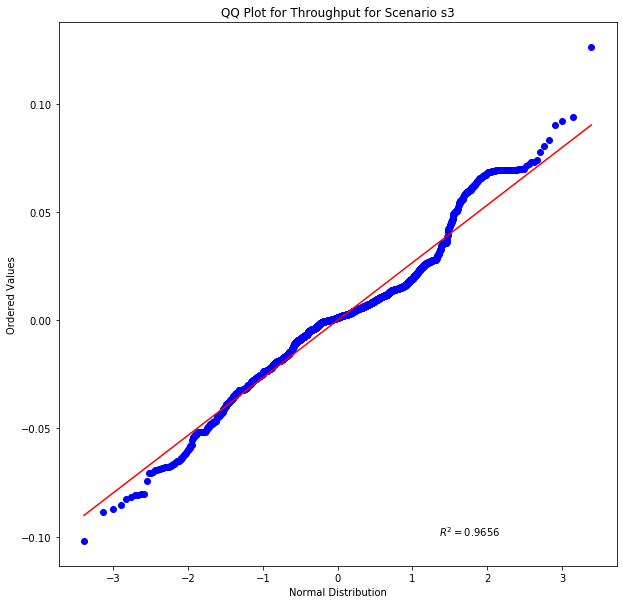

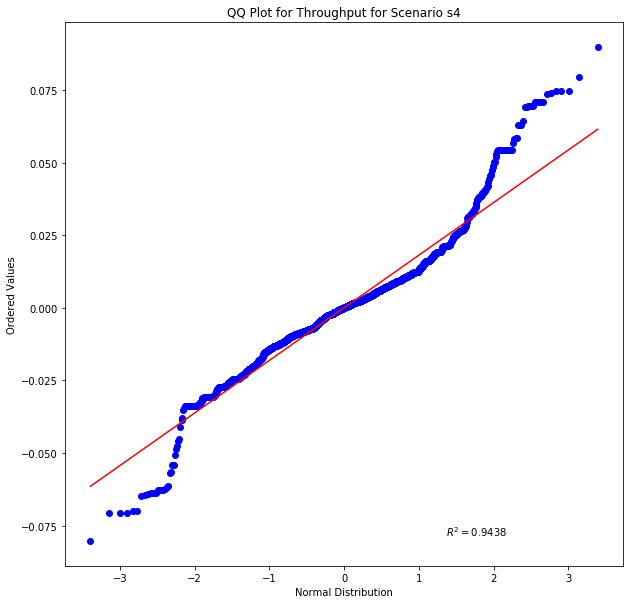

In [24]:
for scenario in scenarios:
    #Set the dimensions of the plot
    plt.figure(figsize=(10,10))

    repThroughput=dfThroughput.loc[(dfThroughput['scenario']==scenario)]['throughput_residual']
    qqPlot = stats.probplot(list(repThroughput), dist='norm',plot=plt,rvalue=True)
    plt.title("QQ Plot for Throughput for Scenario "+scenario)
    plt.xlabel("Normal Distribution")


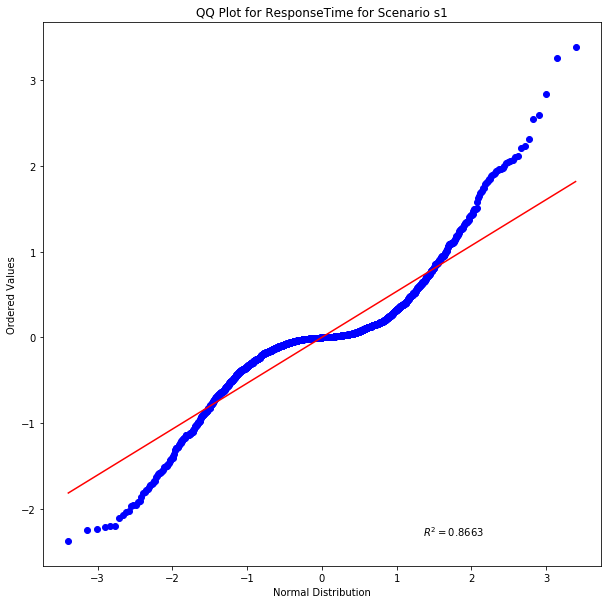

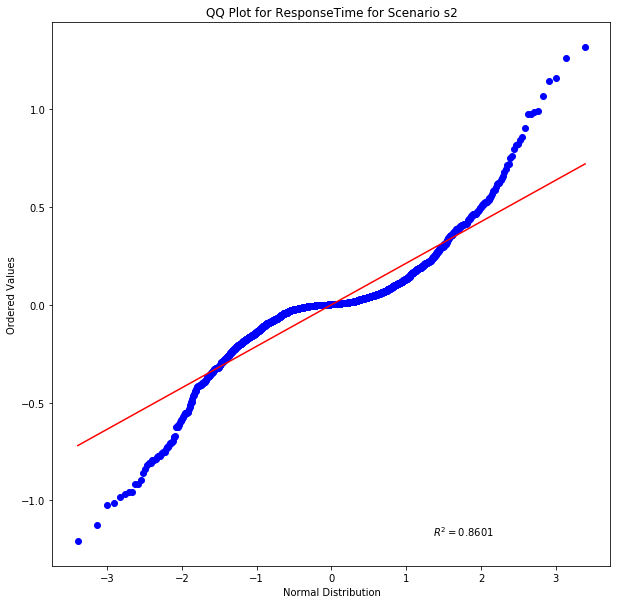

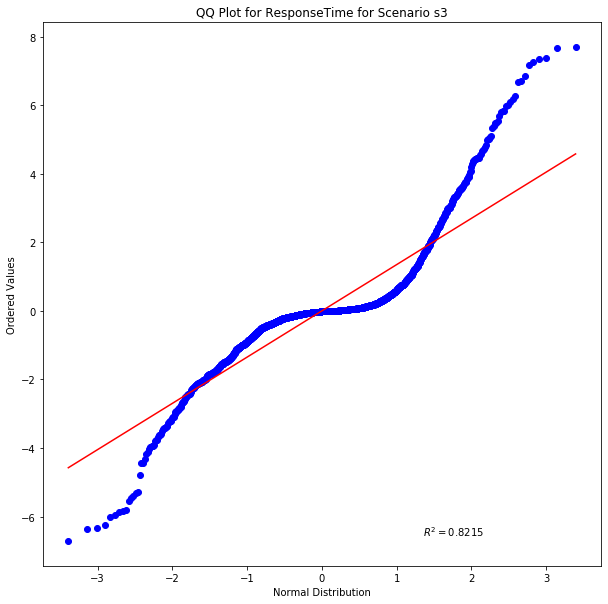

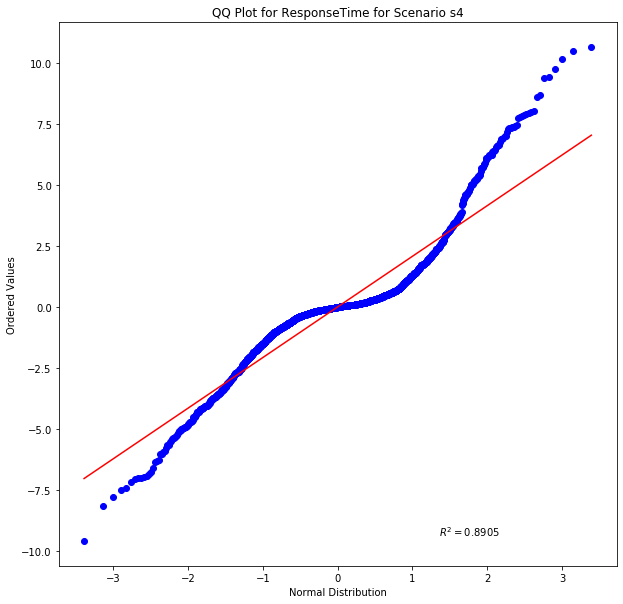

In [54]:
for scenario in scenarios:
    #Set the dimensions of the plot
    plt.figure(figsize=(10,10))

    repResponseTime=dfResponseTime.loc[(dfResponseTime['scenario']==scenario)]['responseTime_residual']
    qqPlot = stats.probplot(list(repResponseTime), dist=st.norm, plot=plt,rvalue=True)
    plt.title("QQ Plot for ResponseTime for Scenario "+scenario)
    plt.xlabel("Normal Distribution")